In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from google.colab import files

# Creacion del modelo y entrenamiento

In [ ]:
# Datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


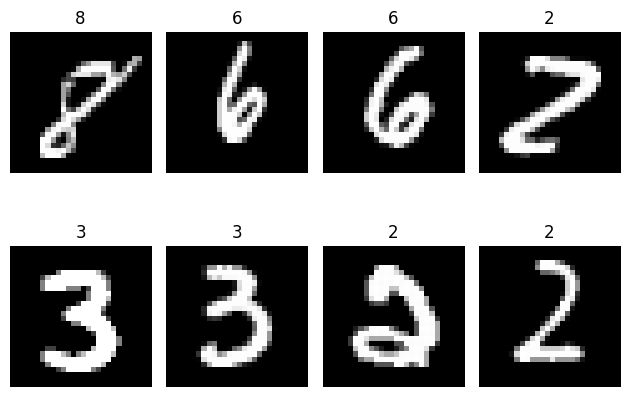

In [ ]:
# Visualizacion de datos
muestra = 8
poblacion, _, _ = X_train.shape
indices = np.random.choice(poblacion, muestra)

fig, axs = plt.subplots(muestra//4, 4)
axs = axs.flatten()
for i, indice in enumerate(indices):
    axs[i].imshow(X_train[indice], cmap='gray')
    axs[i].set_title(y_train[indice])
    axs[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Preprocesesamos los datos
def preprocesar_datos(data):
  data = data/255.0
  data = data.reshape(-1, 28, 28, 1)
  return data

X_train = preprocesar_datos(X_train)
X_test = preprocesar_datos(X_test)

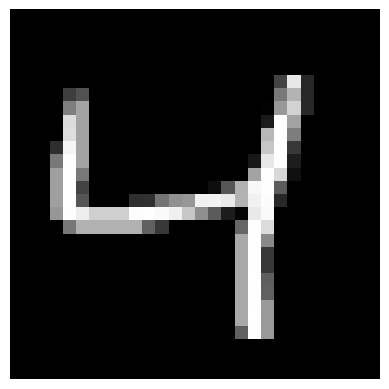

In [ ]:
plt.imshow(X_train[2][:,:,0], cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Estableciendo el modelo
modelCNN = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

modelCNN.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilando y entrenando
modelCNN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_m1 = modelCNN.fit(
    X_train, y_train,
    epochs=25,
    batch_size=50,
    validation_data=(X_test, y_test),
    # callbacks=[early_stopping]
)

Epoch 1/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9977 - loss: 0.0075 - val_accuracy: 0.9916 - val_loss: 0.0298
Epoch 2/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9983 - loss: 0.0055 - val_accuracy: 0.9913 - val_loss: 0.0371
Epoch 3/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9984 - loss: 0.0054 - val_accuracy: 0.9894 - val_loss: 0.0416
Epoch 4/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9985 - loss: 0.0044 - val_accuracy: 0.9914 - val_loss: 0.0353
Epoch 5/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 0.9884 - val_loss: 0.0475
Epoch 6/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9988 - loss: 0.0044 - val_accuracy: 0.9923 - val_loss: 0.0351
Epoch 7/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9993 - loss: 0.0022 - val_accuracy: 0.9911 - val_loss: 0.0461
Epoch 8/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9988 - loss: 0.0039 - 

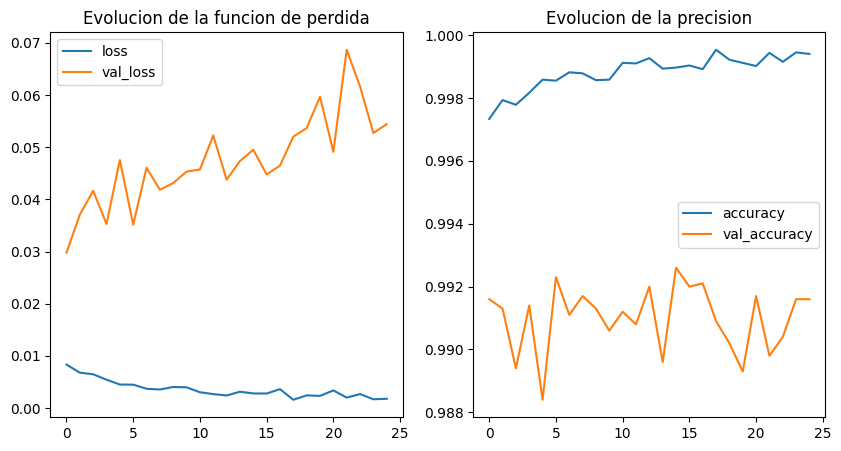

In [ ]:
# Evolucion del modelo
def plot_evolution(history):
  history = history.history
  loss = history['loss']
  val_loss = history['val_loss']
  accuracy = history['accuracy']
  val_accuracy = history['val_accuracy']
  fig, axs = plt.subplots(1, 2, figsize=(10,5))
  axs[0].plot(loss, label='loss')
  axs[0].plot(val_loss, label='val_loss')
  axs[0].set_title('Evolucion de la funcion de perdida')
  axs[0].legend()
  axs[1].plot(accuracy, label='accuracy')
  axs[1].plot(val_accuracy, label='val_accuracy')
  axs[1].set_title('Evolucion de la precision')
  axs[1].legend()
  plt.show()

plot_evolution(history_m1)

In [ ]:
# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = modelCNN.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9884 - loss: 0.0748
Precisión en el conjunto de prueba: 99.16%


In [ ]:
# Guardando modelo
modelCNN.save('modelCNN.keras')

Usando Aumento de datos y DropOut

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Estableciendo el nuevo modelo
modelCNN_plus = models.Sequential([
    layers.Input(shape=(28, 28, 1)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

modelCNN_plus.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenando el nuevo modelo
modelCNN_plus.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

modelCNN_plus.fit(
    datagen.flow(X_train, y_train, batch_size=50),
    epochs=25,
    batch_size=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1200/1200 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.6623 - loss: 0.9918 - val_accuracy: 0.9796 - val_loss: 0.0664
Epoch 2/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.8980 - loss: 0.3367 - val_accuracy: 0.9862 - val_loss: 0.0416
Epoch 3/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9262 - loss: 0.2469 - val_accuracy: 0.9871 - val_loss: 0.0387
Epoch 4/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.9416 - loss: 0.1965 - val_accuracy: 0.9891 - val_loss: 0.0319
Epoch 5/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 0.9509 - loss: 0.1645 - val_accuracy: 0.9899 - val_loss: 0.0337
Epoch 6/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.9553 - loss: 0.1442 - val_accuracy: 0.9896 - val_loss: 0.0289
Epoch 7/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9572 - loss: 0.1415 - val_accuracy: 0.9907 - val_loss: 0.0254
Epoch 8/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.9619 - loss: 0.13

In [ ]:
# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = modelCNN_plus.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9924 - loss: 0.0229
Precisión en el conjunto de prueba: 99.39%


In [ ]:
# Guardando modelo
modelCNN_plus.save('modelCNNplus.keras')

# Prueba de los modelos

In [12]:
def prepro_img (img_path):
  # Preprocesamiento de imagen
  img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img / 255.0
  img = 1 - img
  return img


def upload_prepro_img():
  # Subir la imagen
  imagen = files.upload()
  imagen_path = list(imagen.keys())[0]
  img = prepro_img(imagen_path)
  ! rm {imagen_path}
  return img


def show_img (img):
  # Mostrar la imagen
  plt.figure(figsize=(2, 2))
  plt.imshow(img[0][:,:,0], cmap='gray')
  plt.title('Numero')
  plt.axis('off')
  plt.show()


def make_pred (img, model):
  # Realizar las predicciones
  pred = model.predict(img, verbose=0)
  pred_class = np.argmax(pred)
  return pred_class

In [6]:
# Cargar los modelos
model = models.load_model('modelCNN.keras')
model_plus = models.load_model('modelCNNplus.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Probaremos los modelos con 4 imagenes propias

In [15]:
imagenes = []
for i in range(4):
  img = upload_prepro_img()
  imagenes.append(img)

Saving img1.png to img1.png


Saving img2.png to img2.png


Saving img3.png to img3.png


Saving img4.png to img4.png


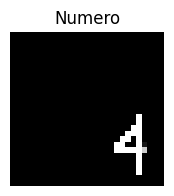

 CNN: 2
 CNN + aumento de datos + drop out: 2


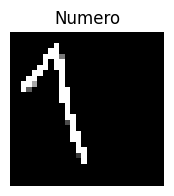

 CNN: 8
 CNN + aumento de datos + drop out: 1


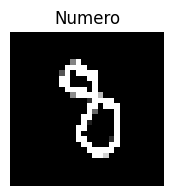

 CNN: 8
 CNN + aumento de datos + drop out: 8


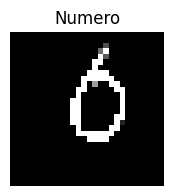

 CNN: 0
 CNN + aumento de datos + drop out: 6


In [16]:
for imagen in imagenes:
  # Mostrar la imagen
  show_img(imagen)

  # Predicciones
  print(f' CNN: {make_pred(imagen, model)}')
  print(f' CNN + aumento de datos + drop out: {make_pred(imagen, model_plus)}')

Vemos que el segun modelo llega a ser mas exacto, aunque aún se equivoca